In [132]:
from snappy import ProductIO
from snappy import jpy
from snappy import GPF

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import numpy as np

from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
from datetime import timedelta
from datetime import datetime

import zipfile
import os 
import time
import shutil
import pickle

ImportError: No module named linalg

In [ ]:
images_path = "/media/DATA-4To/Sentinel"
with open(images_path+"/ImageDataMatrix.txt", "rb") as fp:   # Unpickling
    data = pickle.load(fp)

# MAD METHOD

In [174]:
X = data[0] #image0 
Y = data[10] #image9 

# change vector
def change_vector(X,Y,a=np.ones(len(X)-1),b=np.ones(len(Y)-1)):
    cv = []
    for i in range(len(X)-1) :
        cv.append(a[i]*X[i][:,:] - b[i]*Y[i][:,:])
    return cv

cv = change_vector(X,Y)
# ici cv est le vecteur contenant la différence entre les deux images sur les 16 bandes
# cv forme : cv[0-15][0-124,0-124]

date image 0 :20191008
date image 10 :20191011


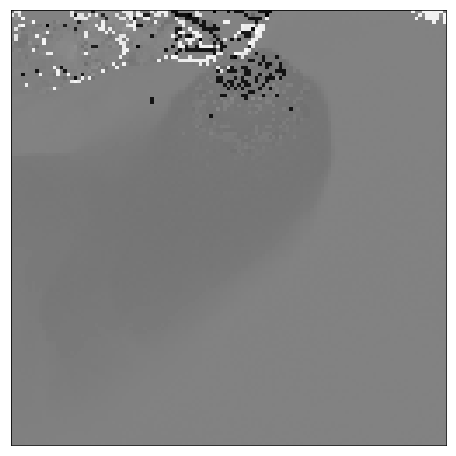

In [98]:
# simple différence entre la phot 1 et 11 de la 3eme longueur dondes
print('date image 0 :'+data[0][-1][0])
print('date image 10 :'+data[10][-1][0])
plt.figure(figsize=(8, 8))                 # adjusting the figure window size
fig = plt.imshow(cv[6], cmap = cm.gray)  # longueur d'onde : 560nm
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

In [165]:
# variance 
# creation d'un vecteur unitaire v.T*v = 1
def unit_vect(size):
    return np.ones(size)/ np.linalg.norm(np.ones(size))
v = unit_vect(16)
print v
print v.transpose().dot(v)

[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25]
1.0


In [169]:
def variance (cv,v = unit_vect(16)):
    var = []
    for i in range(len(cv)):
        var.append(v[i]*cv[i])
    return var

In [170]:
var = variance(cv)
var

[array([[-0.05725883,  0.23774225,  0.22856381, ...,  0.25063785,
          0.22779932,  0.        ],
        [ 0.24815212,  0.0221839 ,  0.2322535 , ...,  0.24598225,
         -0.00755791,  0.2364147 ],
        [ 0.0041612 ,  0.04738914,  0.        , ...,  0.24546496,
         -0.01924955,  0.24503923],
        ...,
        [-0.00874355, -0.00838649, -0.00746178, ..., -0.0025956 ,
         -0.00179907, -0.00260933],
        [-0.00802026, -0.00785089, -0.00759911, ..., -0.0016068 ,
         -0.0025956 , -0.00336009],
        [-0.00809351, -0.00778222, -0.00783258, ..., -0.00297098,
         -0.00191351, -0.00264595]]),
 array([[-0.05601825,  0.23603016,  0.23178199, ...,  0.24957123,
          0.22988221,  0.        ],
        [ 0.24725487,  0.02207862,  0.23127843, ...,  0.24507585,
         -0.00592364,  0.23759119],
        [ 0.00278787,  0.04581897,  0.        , ...,  0.24558398,
         -0.01843928,  0.24485154],
        ...,
        [-0.00970031, -0.00884884, -0.00777306, ..., -